In [1]:
import tensorflow as tf
import numpy as np
import utils
from matplotlib import pyplot as plt
import cv2
import random

In [15]:
test_names = []
train_names = []
with open('./cub200data/CUB_200_2011/images.txt', 'r') as images_file, open('./cub200data/CUB_200_2011/train_test_split.txt', 'r') as splits:
    for name_line, split_line in zip(images_file, splits):
        _, name = name_line.split()
        _, split = split_line.split()
        if split == "0":
            test_names.append(name)
        else:
            train_names.append(name)

In [2]:
TEST_DIR = './cub200data/CUB_200_2011/test'

CLASSES = 200

BATCH_SIZE = 64
TARGET_SIZE = (256, 256)

In [3]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,)
    
val_gen = test_datagen.flow_from_directory(
    TEST_DIR, 
    batch_size = BATCH_SIZE, 
    target_size = TARGET_SIZE,
        shuffle = False)

Found 5794 images belonging to 200 classes.


In [4]:
model = utils.load_model('finetuned_220108230641')

2022-01-11 13:40:32.571648: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-11 13:40:32.572524: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-11 13:40:32.575923: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
y_true = []
y_pred = []
def iterer():
    yield random

for images, labels in val_gen: # takes ~ 15 minutes on my cpu
    y = model(images, training = False)
    x = tf.argmax(labels, axis = 1)
    y_true.extend(list(tf.argmax(labels, axis = 1).numpy()))
    y_pred.extend(list(tf.argmax(y, axis = 1).numpy()))

In [ ]:
# see what classes the model is doing poor

In [ ]:
# chart confusion matrix 

In [ ]:
# see what features the model is confusing

In [ ]:
incorrect_images = []
for y, y_hat, path in zip(y_true, y_pred, test_names):
    if y != y_hat:
        incorrect_images.append(path)

./cub200data/CUB_200_2011/test/197.Marsh_Wren/Marsh_Wren_0119_188404.jpg


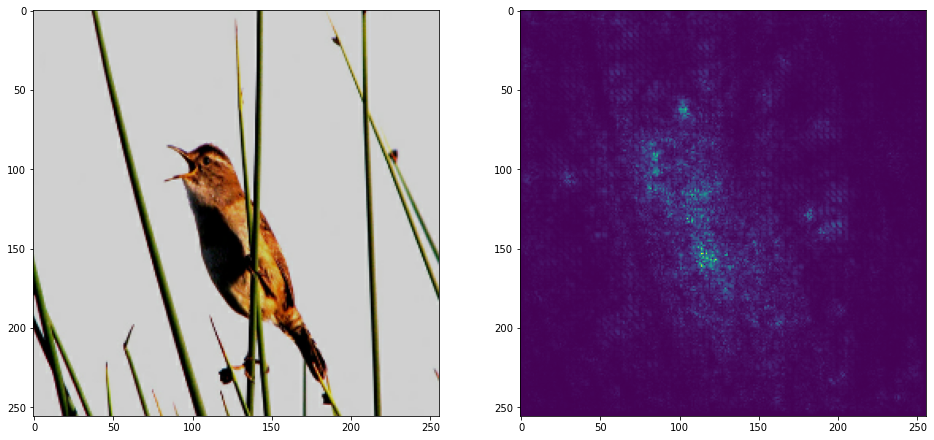

In [24]:
def show_heatmap(image_path, model):
    _, ax = plt.subplots(1, 2, figsize = (16, 16))
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, TARGET_SIZE)
    image = tf.reshape(image, (1, 256, 256, 3))
    with tf.GradientTape() as g:
        g.watch(image)
        y = model(image)
        y_ = tf.math.reduce_max(y)
    dxdy = g.gradient(y_, image)
    dxdy = tf.reduce_sum(np.abs(dxdy), axis = -1)
    dxdy = dxdy / tf.reduce_max(dxdy)
    alpha = dxdy
    alpha = alpha[0].numpy()
    image = image[0].numpy()
    #alpha = alpha ** .5
    
    ax[0].imshow(image)
    ax[1].imshow(alpha)
    

    plt.show()

image = random.choice(test_names)
image_path = f'./cub200data/CUB_200_2011/test/{image}'
show_heatmap(image_path, model)

In [ ]:
test_names[0]